# CellPLATO | Cell Plasticity Analysis Tool

In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px

OVERWRITE_DATAFRAMES = True

Finished running cellPLATO initialization and loaded config.
Initializing:  Figure_1_ThreeConditions_Go_Stopping_Stopped_2-14-2023
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1/ThreeConditions_Go_Stopping_Stopped_OUTPUT/Figure_1_ThreeConditions_Go_Stopping_Stopped_2-14-2023\2023-03-06_11-47-36-667184\plots/
Using unique embedding per dataset shortname:  Figure_1_ThreeConditions_Go_Stopping_Stopped_2-14-2023
Exporting static Plots of Differences
Using corresponding CTL_SHORTLABEL:  Untreated  for condition:  Condition_Migrating
Dataset in current notebook:  Figure_1_ThreeConditions_Go_Stopping_Stopped_2-14-2023
Finished initializing data_processing



Bad key text.latex.preview in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

Finished intializing visualizations
Finished initializing cellPLATO


In [2]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)
print(cp.SAVED_DATA_PATH)

,Condition,Experiment,Replicate_ID,Condition_shortlabel,Replicate_shortlabel
0,Condition_Migrating,PBMCeNK_untreated_1__tracks,PBMCeNK_untreated_1__tracks,Untreated,Untreated_0
1,Condition_Slowing,PBMCeNK_CytoD_1_tracks,PBMCeNK_CytoD_1_tracks,CytoD 0.5 uM,CytoD 0.5 uM_0
2,Condition_Stopped,PBMCeNK_CytoD_2_tracks,PBMCeNK_CytoD_2_tracks,CytoD 2 uM,CytoD 2 uM_0


D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1/ThreeConditions_Go_Stopping_Stopped_OUTPUT/Figure_1_ThreeConditions_Go_Stopping_Stopped_2-14-2023\saved_data/


In [7]:
factorstoinclude = cp.ALL_FACTORS + ['label']

df_in=tptlabel_dr_df[factorstoinclude]

clusteraverage_df_nonnormalized = df_in.groupby('label').mean()#.reset_index(drop=True)

clusteraverage_df_nonnormalized

,area,bbox_area,eccentricity,equivalent_diameter,extent,filled_area,major_axis_length,minor_axis_length,orientation,perimeter,...,dir_autocorr,outreach_ratio,MSD,max_dist,glob_turn_deg,arrest_coefficient,aspect,rip_p,rip_K,rip_L
label,,,,,,,,,,,,,,,,,,,,,
-1,75.225307,127.297601,0.753927,9.416687,0.341791,75.225307,13.257788,7.319612,0.156993,34.334213,...,0.708232,0.214933,0.312696,0.790789,2.126278,0.827450,1.891191,38.398278,9242.571730,53.626189
0,82.319578,119.731440,0.639379,10.077919,0.381797,82.319578,12.379751,8.618996,0.047788,34.540576,...,0.608535,0.163245,5.636928,3.843441,0.486978,0.000000,1.451842,28.104716,10631.455950,57.448633
1,72.437611,98.961487,0.543173,9.538992,0.398534,72.437611,10.791404,8.616685,0.006095,31.339119,...,0.481945,0.200561,0.042681,0.296371,-0.725188,0.972499,1.256847,41.464775,9345.543129,54.243291
2,56.068538,76.062726,0.537400,8.332451,0.403021,56.068538,9.500818,7.488720,0.109287,27.092845,...,0.454868,0.198920,1.072931,1.749440,1.280784,0.428949,1.281849,29.222891,9638.708054,54.815323


In [3]:
size=250

# lab_tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')
# exemplar_tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv')
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df_singletpoints=cp.contribution_to_clusters_topdictionary(df_in=tptlabel_dr_df,  howmanyfactors=10) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 


factor area has no negative values
factor bbox_area has no negative values
factor eccentricity has no negative values
factor equivalent_diameter has no negative values
factor extent has no negative values
factor filled_area has no negative values
factor major_axis_length has no negative values
factor minor_axis_length has no negative values
factor orientation has negative values
factor perimeter has no negative values
factor solidity has no negative values
factor euclidean_dist has no negative values
factor cumulative_length has no negative values
factor speed has no negative values
factor orientedness has no negative values
factor directedness has negative values
factor turn_angle has negative values
factor endpoint_dir_ratio has no negative values
factor dir_autocorr has negative values
factor outreach_ratio has no negative values
factor MSD has no negative values
factor max_dist has no negative values
factor glob_turn_deg has negative values
factor arrest_coefficient has no negative

In [4]:
contributions_df_singletpoints

,area,bbox_area,eccentricity,equivalent_diameter,extent,filled_area,major_axis_length,minor_axis_length,perimeter,solidity,...,arrest_coefficient,aspect,rip_p,rip_K,rip_L,orientation,directedness,turn_angle,dir_autocorr,glob_turn_deg
label,,,,,,,,,,,,,,,,,,,,,
-1,0.627767,0.550173,0.984386,0.627767,0.726240,0.627767,0.509831,0.645775,0.556051,0.858719,...,1.000000,0.278639,0.812712,0.703864,0.703864,0.612616,0.540080,0.509105,0.954660,0.516693
0,0.672702,0.544912,0.973920,0.672702,0.801418,0.672702,0.481029,0.689038,0.561550,0.897931,...,0.000000,0.176661,0.686821,0.759016,0.759016,0.527076,0.488711,0.505104,0.955868,0.506080
1,0.619188,0.492853,0.959971,0.619188,0.825008,0.619188,0.403694,0.690878,0.498735,0.910405,...,1.000000,0.105376,0.829932,0.710241,0.710241,0.506444,0.498510,0.493538,0.878942,0.492229
2,0.545144,0.430791,0.957662,0.545144,0.836612,0.545144,0.348046,0.629584,0.433084,0.910866,...,0.930276,0.097272,0.673985,0.717994,0.717994,0.565373,0.514096,0.504642,0.859899,0.511860


## Measure shape and motion metrics

In [ ]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
comb_df = cp.combine_dataframes(exp_list)

comb_df, new_factors = cp.measurement_pipeline(comb_df, mixed=cp.MIXED_SCALING, factors_to_timeaverage = cp.ALL_FACTORS) #If AVERAGE_TIME_WINDOWS is true, then the comb df contains new factors, which are output as 'new factors'
display(new_factors)

# Returns a filtered dataframe, while also adding included column to comb_df
comb_df, filt_counts = cp.apply_filters(comb_df)

# Process a time-averaged DataFrame
tavg_df = cp.time_average(comb_df)

### Save newly created dataframes

In [ ]:
OVERWRITE_DATAFRAMES = True


if OVERWRITE_DATAFRAMES:
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv', index=False)
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv', index=False)

### Option to load dataframes if this step is already complete

In [3]:
comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')

# Plot all metrics

In [ ]:
cp.comparative_visualization_pipeline(comb_df, num_factors=cp.ALL_FACTORS) #usually this is done on dr_df so it has all the labels like tsnes and umaps

# Dimensionality reduction (3D UMAP)

### Perform correlation analysis to understand which factors correlate to one another

In [ ]:
df_in = comb_df
# FACTORSTOINCLUDE = only_tmeans
cp.correlation_matrix_heatmap(df_in, factors = cp.ALL_FACTORS)

### Variance thresholder to decide on input factors for dimensionality reduction

In [ ]:
OKDR_FACTORS = cp.variance_threshold(comb_df, threshold_value=0.03)

# Optionally, define new dr factors here

### Perform UMAP DR (and tSNE and PCA) and then cluster analysis on the comb_df

Running dr_pipeline for multi dimension UMAP and tSNE...
tSNE perplexity =  185
UMAP nearest neighbors =  4  min distance =  0.0
Number of UMAP components =  3
DR factors used were['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent', 'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter', 'solidity', 'euclidean_dist', 'cumulative_length', 'speed', 'orientedness', 'directedness', 'turn_angle', 'endpoint_dir_ratio', 'dir_autocorr', 'outreach_ratio', 'MSD', 'max_dist', 'glob_turn_deg', 'arrest_coefficient', 'aspect', 'rip_p', 'rip_K', 'rip_L']
THIS IS THE UNTRANSFORMED DATA 
factor area has no negative values
factor bbox_area has no negative values
factor eccentricity has no negative values
factor equivalent_diameter has no negative values
factor extent has no negative values
factor filled_area has no negative values
factor major_axis_length has no negative values
factor minor_axis_length has no negative values
factor orientation has negative 

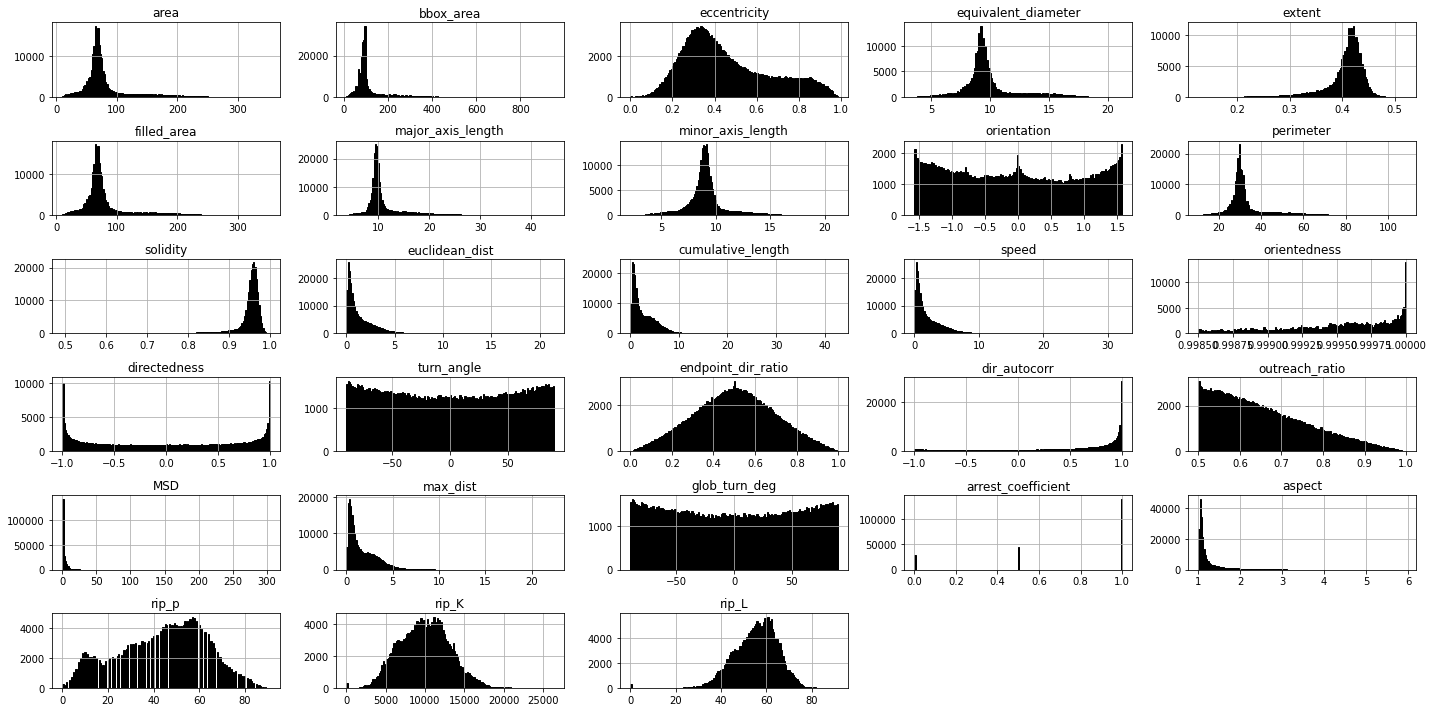

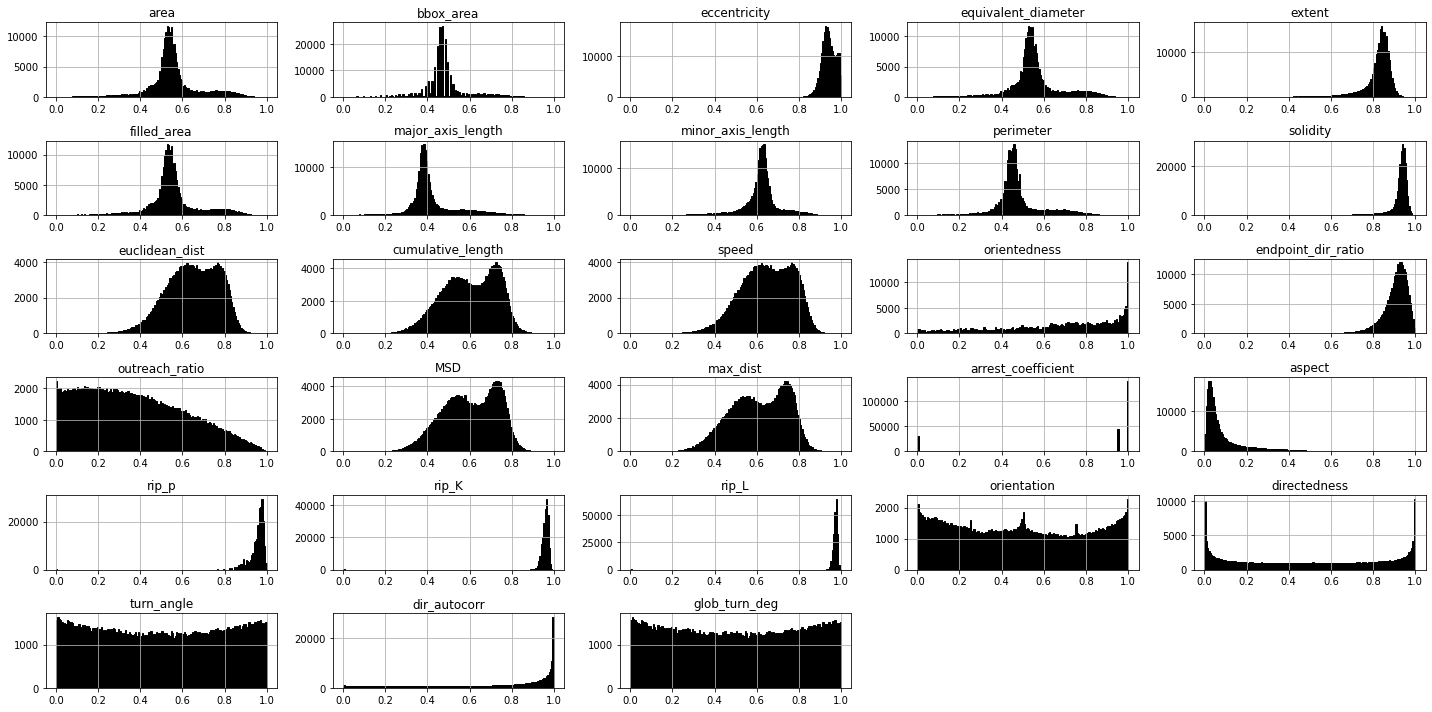

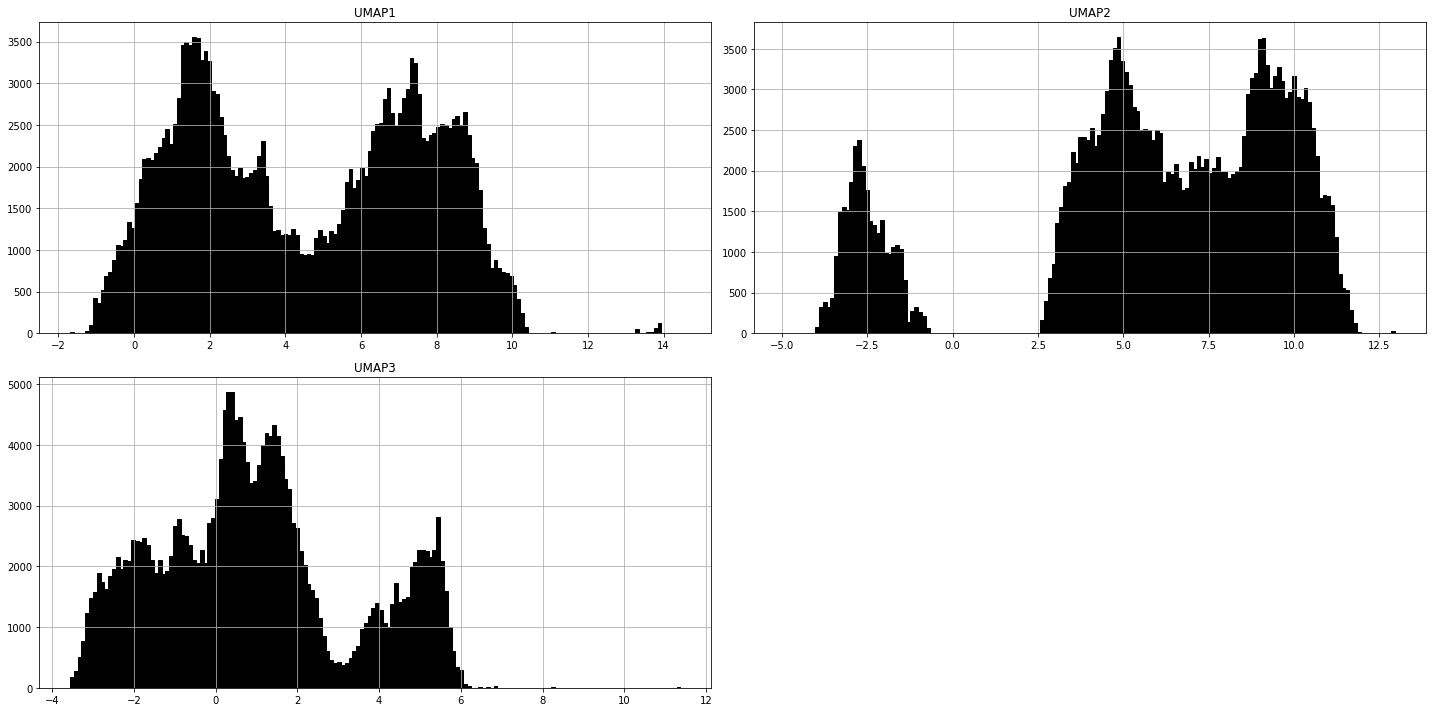

<Figure size 432x288 with 0 Axes>

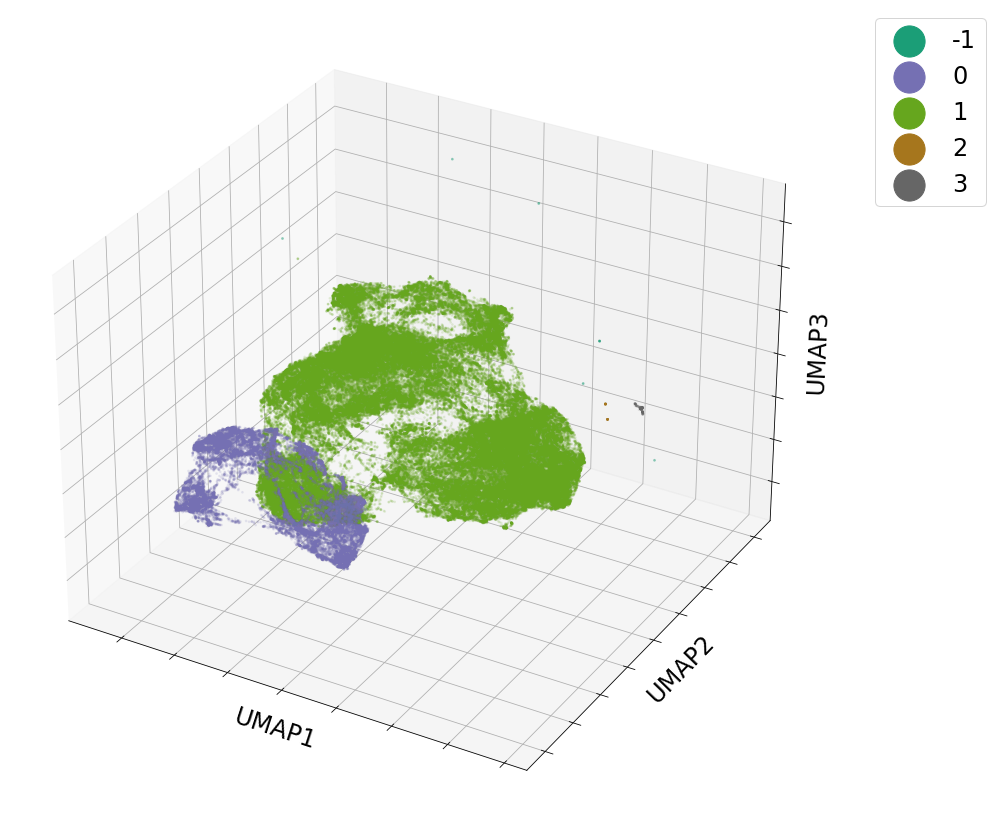

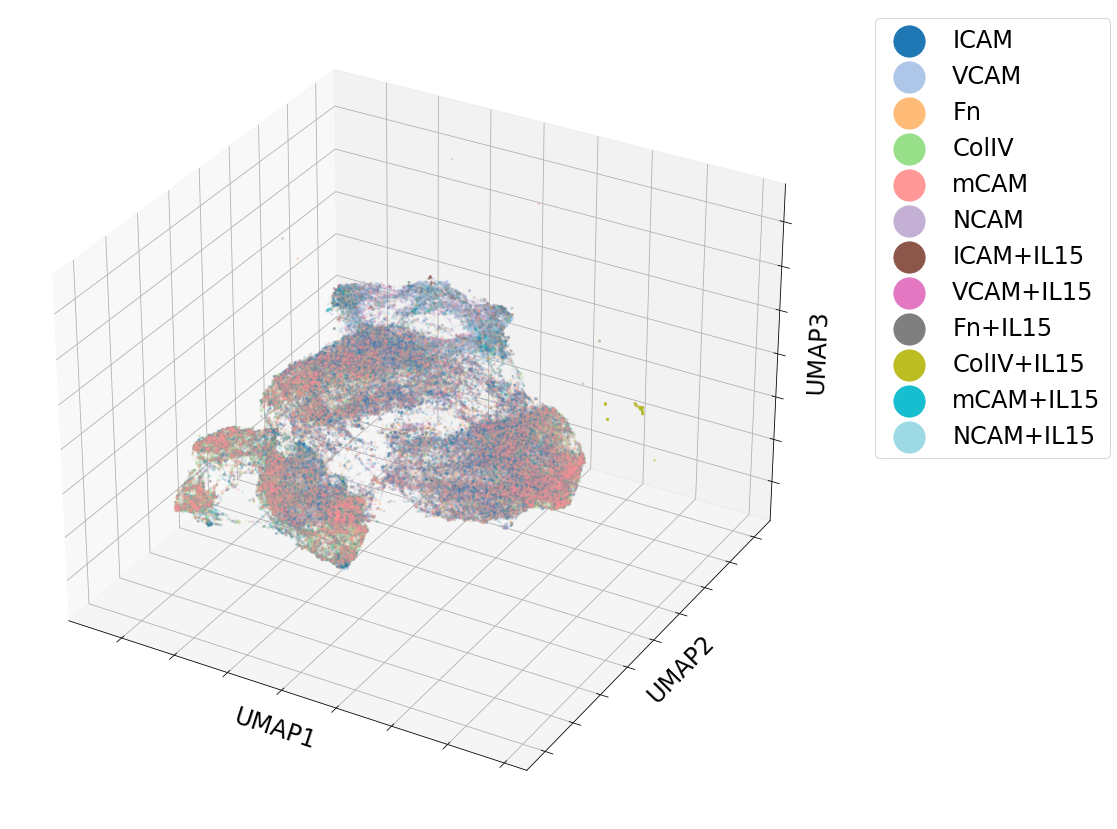

Coloring each UMAP by normalized metric values
Length of metrics is  28
factor area has no negative values
factor bbox_area has no negative values
factor eccentricity has no negative values
factor equivalent_diameter has no negative values
factor extent has no negative values
factor filled_area has no negative values
factor major_axis_length has no negative values
factor minor_axis_length has no negative values
factor orientation has quite a few negative values
factor perimeter has no negative values
factor solidity has no negative values
factor euclidean_dist has no negative values
factor cumulative_length has no negative values
factor speed has no negative values
factor orientedness has no negative values
factor directedness has quite a few negative values
factor turn_angle has quite a few negative values
factor endpoint_dir_ratio has no negative values
factor dir_autocorr has quite a few negative values
factor outreach_ratio has no negative values
factor MSD has no negative values
f

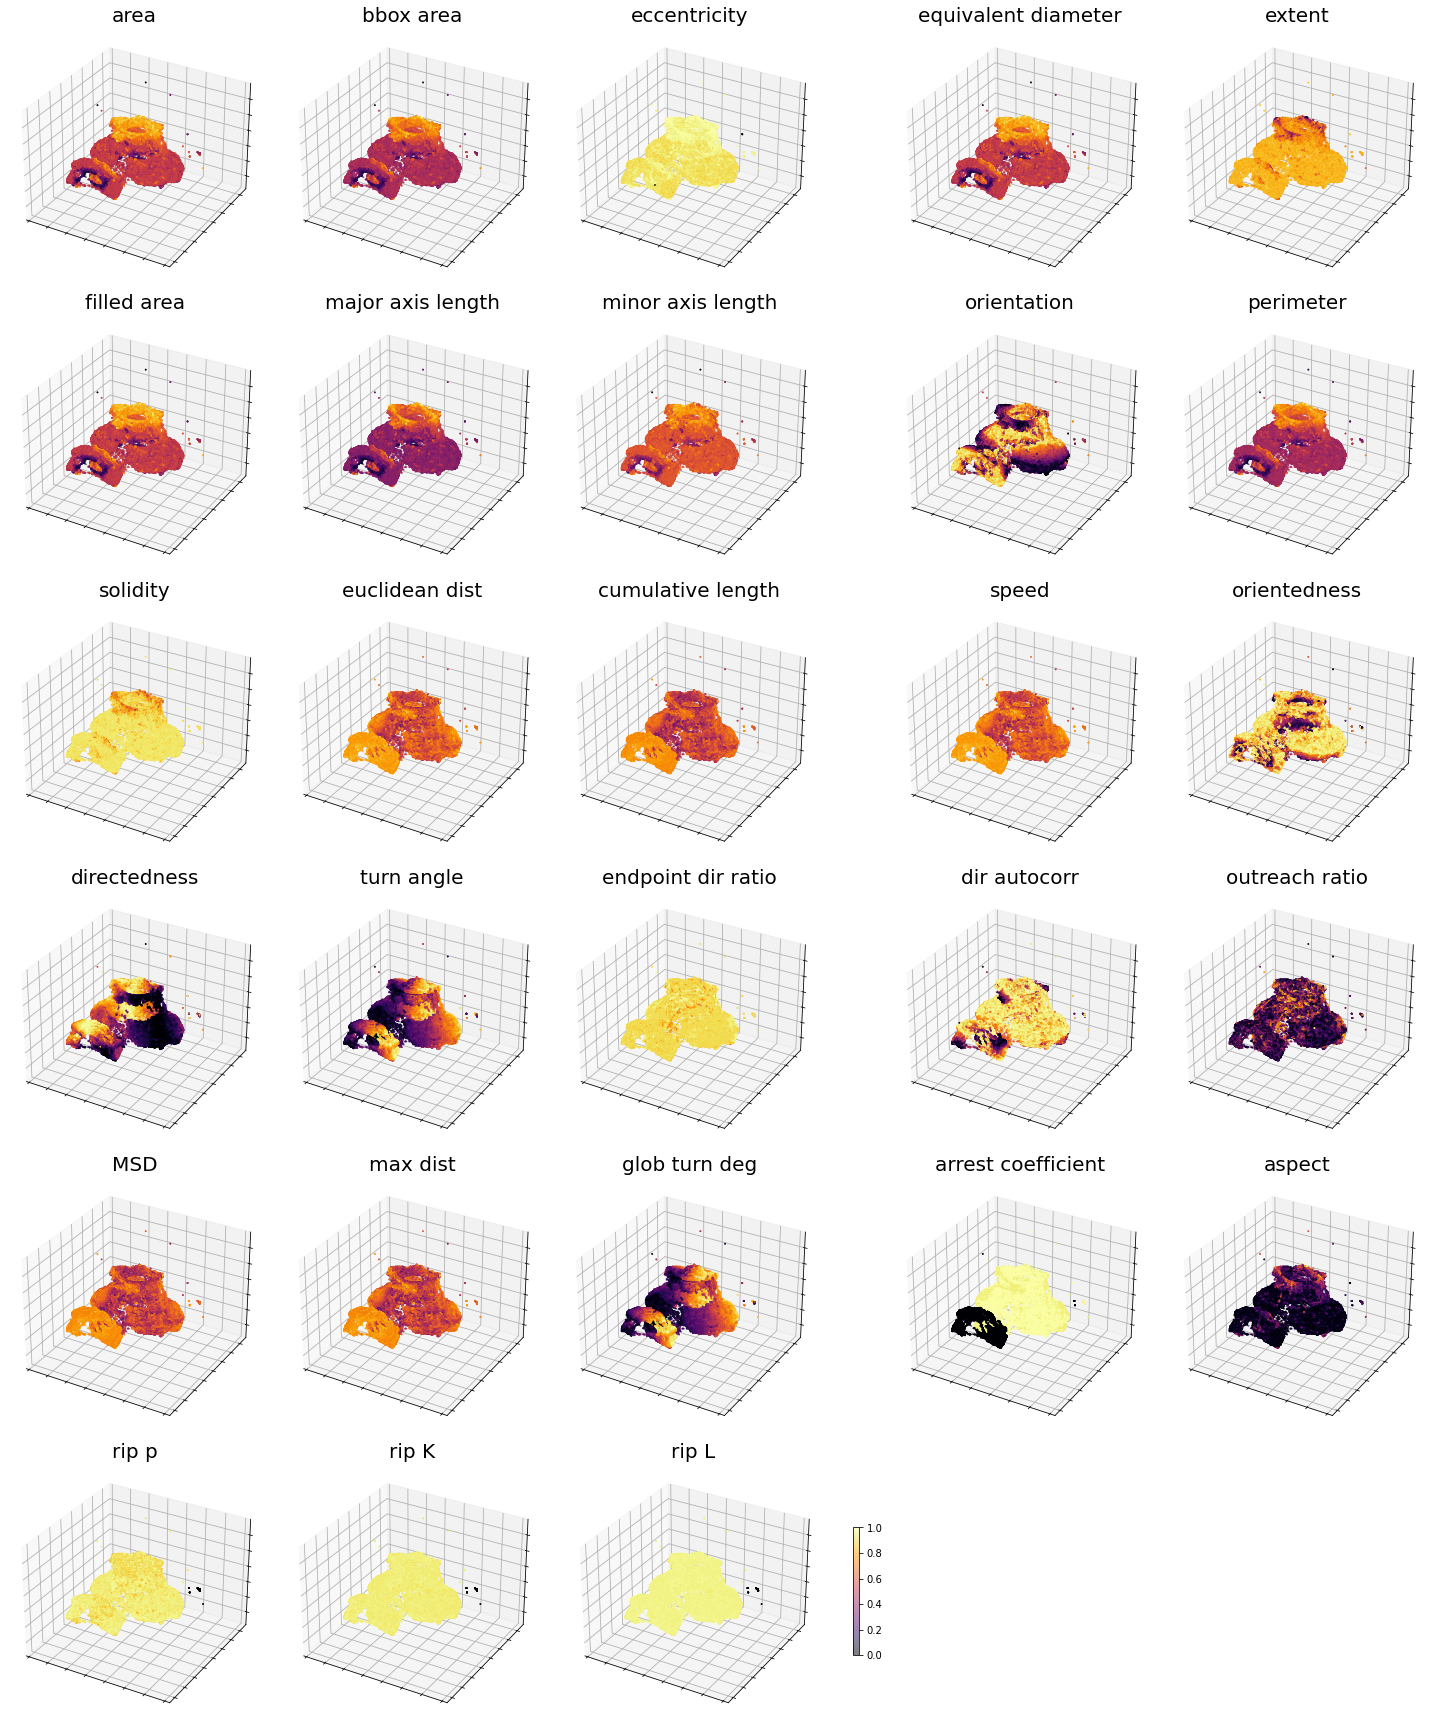

Coloring each UMAP by each condition
['ICAM', 'VCAM', 'Fn', 'ColIV', 'mCAM', 'NCAM', 'ICAM+IL15', 'VCAM+IL15', 'Fn+IL15', 'ColIV+IL15', 'mCAM+IL15', 'NCAM+IL15']
Number of conditions/plots is  12
Number of columns is  5
Number of rows is  3
Main df has  215727  cells. Sampling  21572  cells.
ICAM  has  31877  cells. Sampling  3187  cells.
VCAM  has  29399  cells. Sampling  2939  cells.
Fn  has  29031  cells. Sampling  2903  cells.
ColIV  has  28579  cells. Sampling  2857  cells.
mCAM  has  29240  cells. Sampling  2924  cells.
NCAM  has  31682  cells. Sampling  3168  cells.
ICAM+IL15  has  9896  cells. Sampling  989  cells.
VCAM+IL15  has  8153  cells. Sampling  815  cells.
Fn+IL15  has  5758  cells. Sampling  575  cells.
ColIV+IL15  has  838  cells. Sampling  83  cells.
mCAM+IL15  has  5177  cells. Sampling  517  cells.
NCAM+IL15  has  6097  cells. Sampling  609  cells.


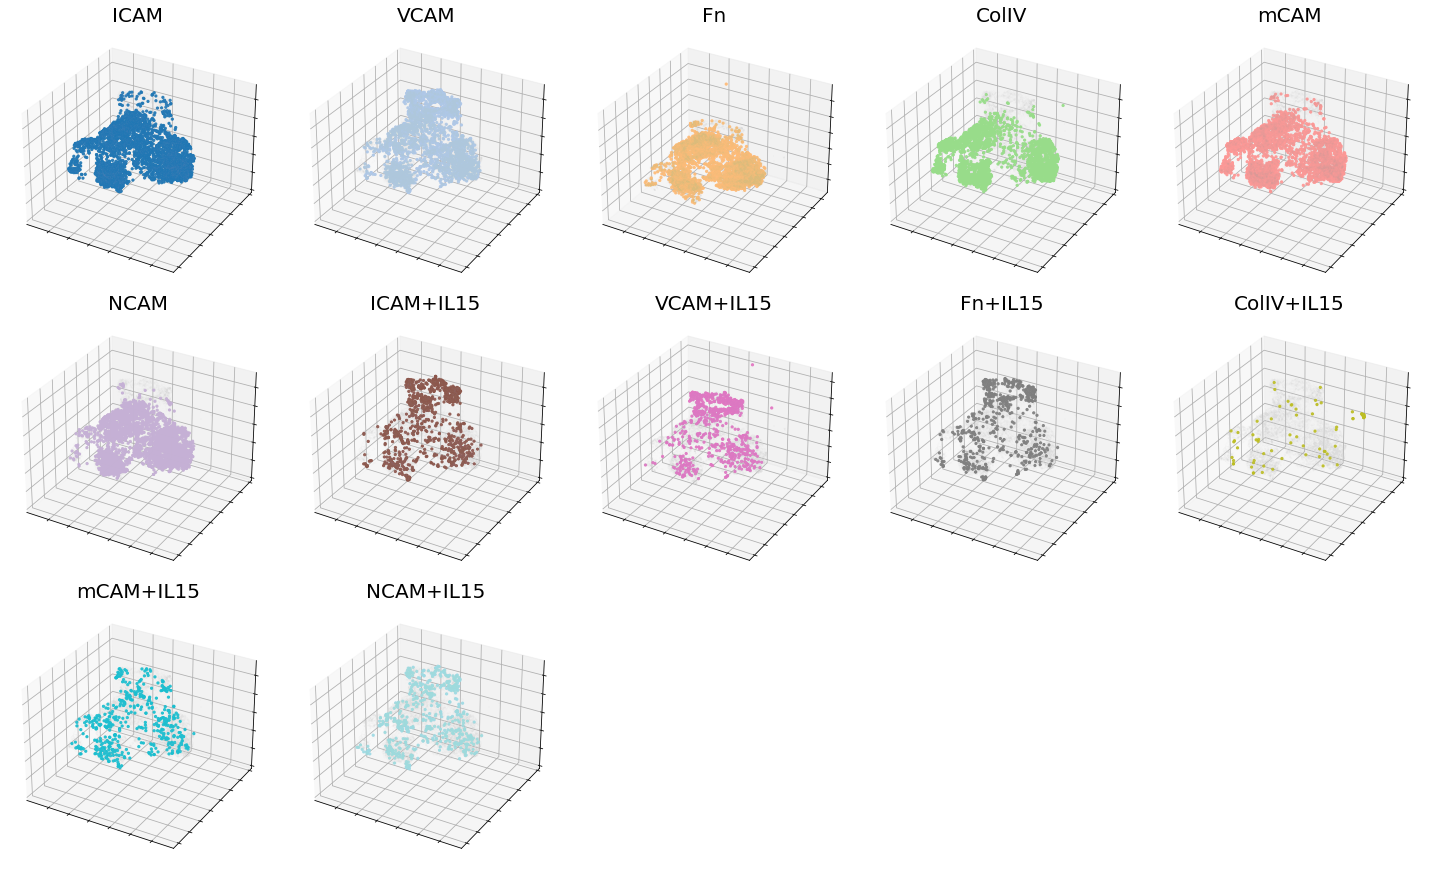

In [7]:
# CHANGE THE MIN DIST

# CHANGE THE INPUT FACTORS

tsne_perp=150
umap_nn = 4#60
min_dist = 0.0 #0.15 
n_components = 3

# DR_FACTORS = new_DR_FACTORS, dominmax=True

dr_df = cp.dr_pipeline_multiUMAPandTSNE(comb_df, 
                    dr_factors=cp.DR_FACTORS,# new_DR_FACTORS # DR_FACTORS #only_tmeans
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist= min_dist,
                    scalingmethod = 'log2minmax',) # log2minmax # powertransformer #minmax
                    # positive_FACTORS = positive_FACTORS,
                    # negative_FACTORS = negative_FACTORS) 

lab_dr_df, exemplar_df=cp.hdbscan_clustering(dr_df, min_cluster_size=50,min_samples=50,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # This one happens with scaling in there again. # compare euclidean with CityBlock
lab_dr_df.name='lab_dr_df'
name = lab_dr_df.name

# dr_df.name='dr_df'
# name = dr_df.name

cp.plot_3D_scatter(lab_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=False, identifier=name + '_byCLUSTERID___',dotsize = 3, alpha=0.1, markerscale = 18) #color = label or condition   
cp.plot_3D_scatter(lab_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=False, identifier=name + '_byCONDITION___',dotsize = 3, alpha=0.1, markerscale = 18) #color = label or condition  
# cp.plot_UMAP_subplots_coloredbymetrics(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='log2minmax', identifier='inferno', colormap='inferno')
cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='log2minmax',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = False, samplethedf = True)
cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='log2minmax',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = True, samplethedf = True)



hdbscan_clustering() with min_cluster_size =  1300
               UMAP1          UMAP2          UMAP3
count  215727.000000  215727.000000  215727.000000
mean        4.579313       5.848636       0.947759
std         3.074220       4.037817       2.382396
min        -1.695066      -4.921786      -3.564464
25%         1.746871       4.194649      -0.821382
50%         4.546922       6.395905       0.716455
75%         7.344297       9.081689       2.141475
max        14.448606      12.962782      11.371482


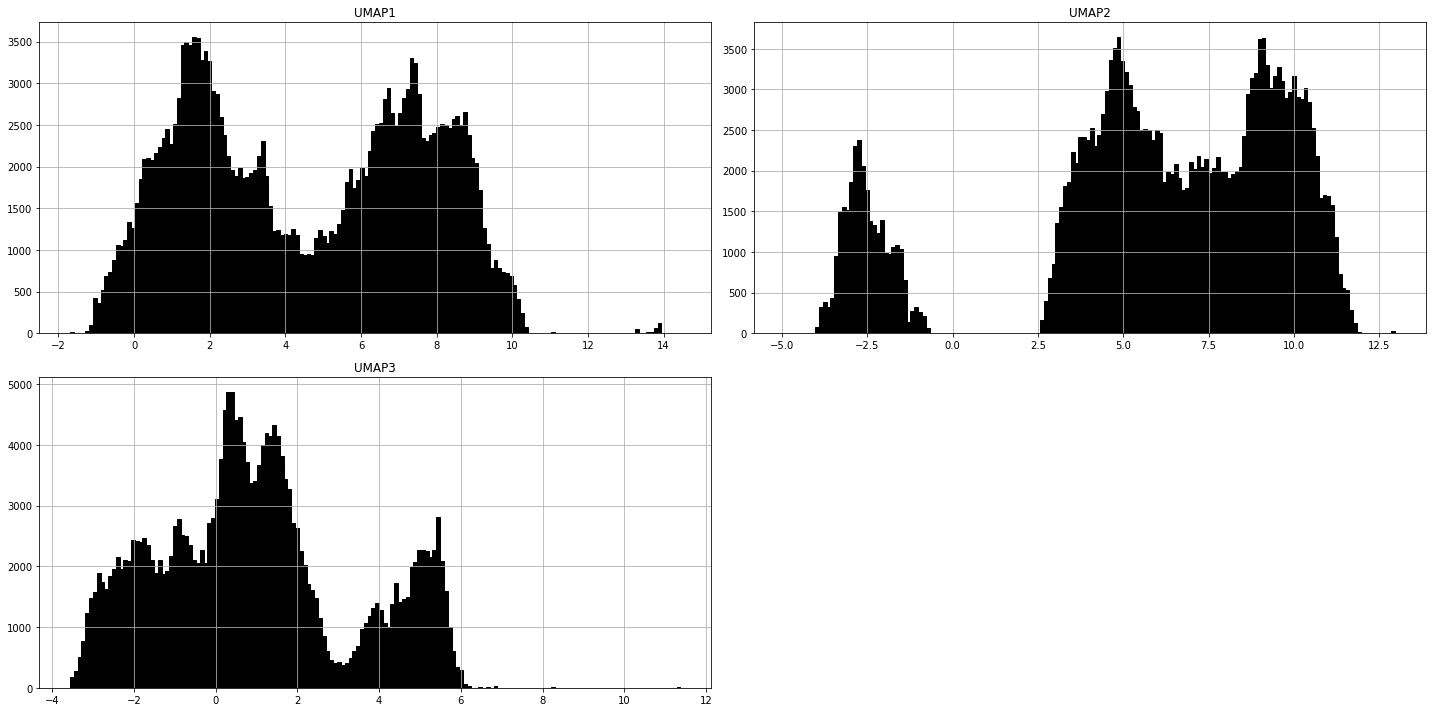

<Figure size 432x288 with 0 Axes>

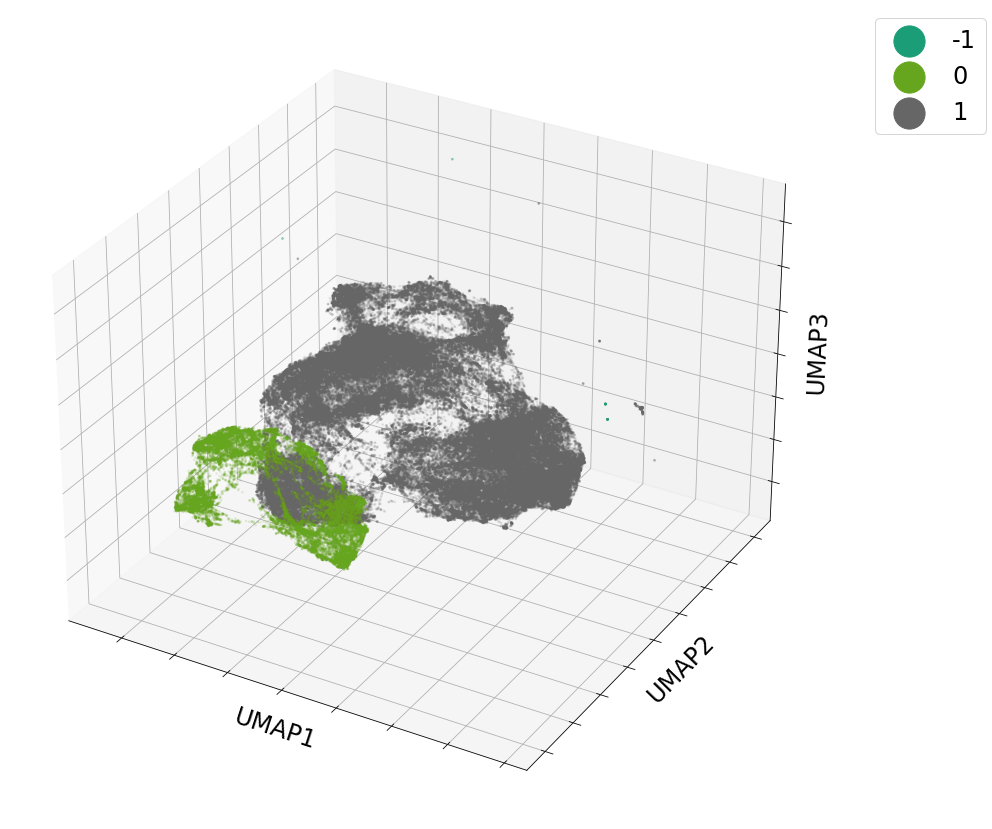

<Axes3DSubplot:xlabel='UMAP1', ylabel='UMAP2'>

In [25]:
lab_dr_df, exemplar_df=cp.hdbscan_clustering(dr_df, min_cluster_size=1300,min_samples=500, cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # This one happens with scaling in there again. # compare euclidean with CityBlock
lab_dr_df.name='lab_dr_df'
name = lab_dr_df.name

# dr_df.name='dr_df'
# name = dr_df.name

cp.plot_3D_scatter(lab_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=False, identifier=name + '_byCLUSTERID___',dotsize = 3, alpha=0.1, markerscale = 18) #color = label or condition   
# cp.plot_3D_scatter(lab_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=False, identifier=name + '_byCONDITION___',dotsize = 3, alpha=0.1, markerscale = 18) #color = label or condition  

Coloring each UMAP by each condition
['ICAM', 'VCAM', 'Fn', 'ColIV', 'mCAM', 'NCAM', 'ICAM+IL15', 'VCAM+IL15', 'Fn+IL15', 'ColIV+IL15', 'mCAM+IL15', 'NCAM+IL15']
Number of conditions/plots is  12
Number of columns is  5
Number of rows is  3
Main df has  215727  cells. Sampling  21572  cells.
ICAM  has  31877  cells. Sampling  3187  cells.
VCAM  has  29399  cells. Sampling  2939  cells.
Fn  has  29031  cells. Sampling  2903  cells.
ColIV  has  28579  cells. Sampling  2857  cells.
mCAM  has  29240  cells. Sampling  2924  cells.
NCAM  has  31682  cells. Sampling  3168  cells.
ICAM+IL15  has  9896  cells. Sampling  989  cells.
VCAM+IL15  has  8153  cells. Sampling  815  cells.
Fn+IL15  has  5758  cells. Sampling  575  cells.
ColIV+IL15  has  838  cells. Sampling  83  cells.
mCAM+IL15  has  5177  cells. Sampling  517  cells.
NCAM+IL15  has  6097  cells. Sampling  609  cells.


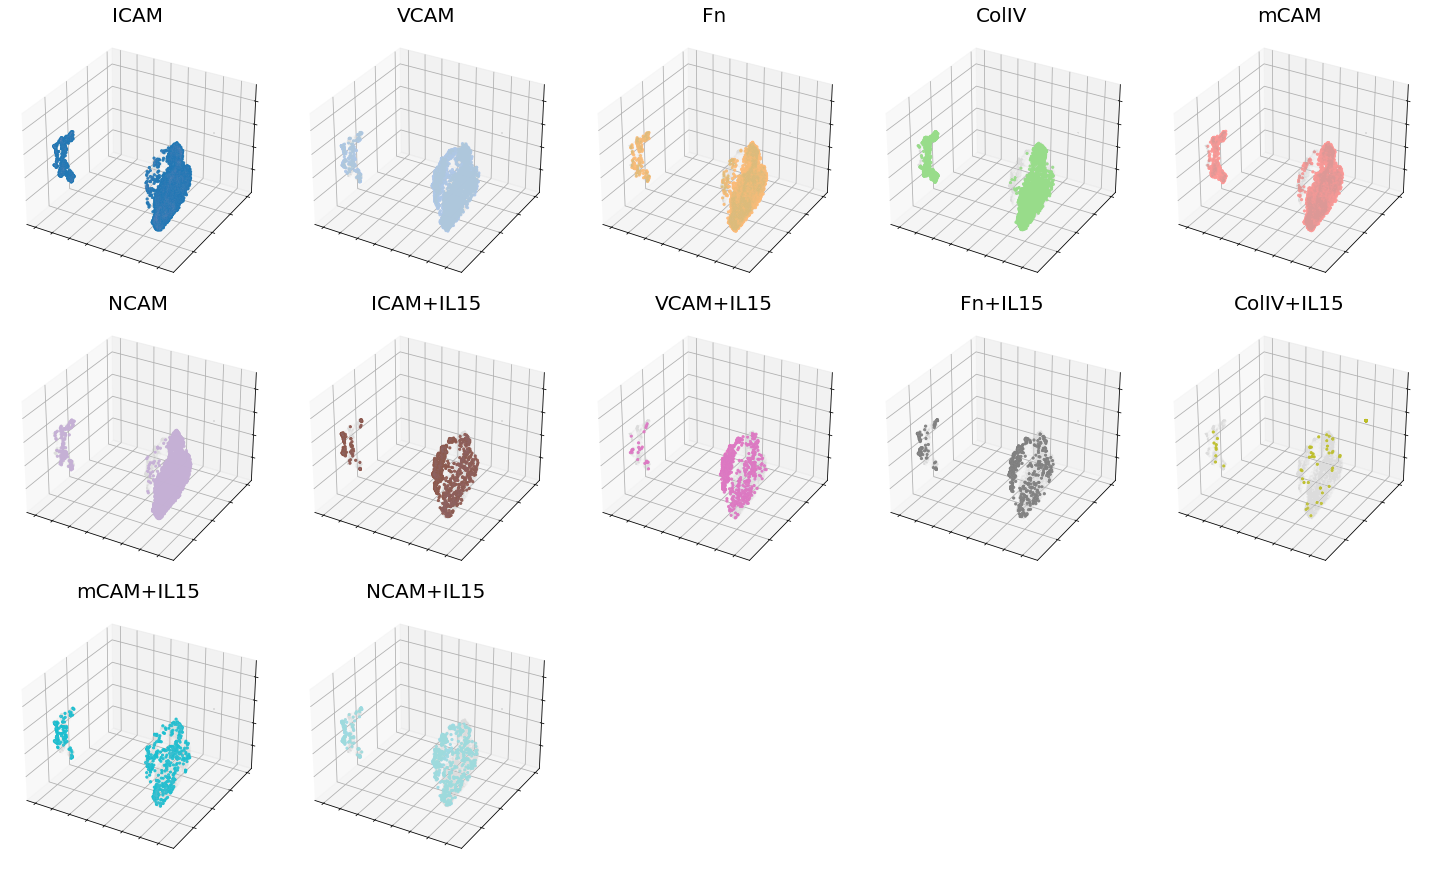

In [5]:
cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='log2minmax',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = True, samplethedf = True)


In [ ]:
# Optional explorable 3D plot

# cp.plot_3D_UMAP(df,colorby = 'Condition_shortlabel', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP') #Update to a simple 3D scatter plot


In [24]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv', index=False)
    lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv', index=False)
    exemplar_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv', index=False)

In [ ]:
dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

### Perform UMAP DR (and tSNE and PCA) and then cluster analysis on the tavg_df

In [ ]:
# CHANGE THE MIN DIST

# # CHANGE THE INPUT FACTORS

# tsne_perp=150
# umap_nn = 5#60
# min_dist = 0.0 #0.15 
# n_components = 3

# # DR_FACTORS = new_DR_FACTORS, dominmax=True

# tavg_dr_df = cp.dr_pipeline_multiUMAPandTSNE(tavg_df, 
#                     dr_factors=cp.DR_FACTORS,# new_DR_FACTORS # DR_FACTORS #only_tmeans
#                     n_components = n_components,
#                     umap_nn=umap_nn,
#                     min_dist= min_dist,
#                     scalingmethod = 'log2minmax',) # log2minmax # powertransformer #minmax
#                     # positive_FACTORS = positive_FACTORS,
#                     # negative_FACTORS = negative_FACTORS) 

lab_tavg_dr_df, exemplar_tavg_df=cp.hdbscan_clustering(tavg_dr_df, min_cluster_size=20,min_samples=20,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # This one happens with scaling in there again. # compare euclidean with CityBlock
lab_tavg_dr_df.name='lab_tavg_dr_df'
name = lab_tavg_dr_df.name
cp.plot_3D_scatter(lab_tavg_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=False, identifier=name + '_byCLUSTERID___', dotsize = 50, alpha=0.5) #color = label or condition   
cp.plot_3D_scatter(lab_tavg_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=False, identifier=name + '_byCONDITION___', dotsize = 50, alpha=0.5) #color = label or condition  
# cp.plot_UMAP_subplots_coloredbymetrics(df_in=lab_tavg_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='log2minmax', identifier='inferno', colormap='inferno')

cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_tavg_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='log2minmax',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = False, samplethedf = True)


In [ ]:
# lab_tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv', index=False)
tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv', index=False)

In [ ]:
lab_tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')


In [ ]:
# Optional explorable 3D plot

# cp.plot_3D_UMAP(df,colorby = 'Condition_shortlabel', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP') #Update to a simple 3D scatter plot


In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv', index=False)
    lab_tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv', index=False)
    exemplar_tavg_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv', index=False)

In [ ]:
tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv')
lab_tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')
exemplar_tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv')

### Add the tavg time averaged cluster labels to the regular df

In [ ]:
#Run this function to put the labels into the lab_tavg_lab_dr_df. Slow function. Can potentially be sped up with groupby.

lab_tavg_lab_dr_df=cp.add_tavglabel_todf(lab_dr_df, lab_tavg_dr_df)

In [ ]:

lab_tavg_lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv', index=False)

In [ ]:
lab_tavg_lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv')


### Cluster counting - how many cells per cluster ID?

In [ ]:
df=lab_tavg_lab_dr_df
label_counts_df = cp.get_label_counts(df)
cp.plot_label_counts(label_counts_df)

### Purity

In [ ]:
clust_sum_df = cp.cluster_purity(lab_dr_df) 
display(clust_sum_df)
f = cp.purity_plots_dev(lab_dr_df, clust_sum_df)

# Quantify plasticity

In [ ]:
# make the final boss: tptlabel_dr_df

tptlabel_dr_df = cp.count_cluster_changes_with_tavg(lab_tavg_lab_dr_df)
# sum_labels, tptlabel_dr_df = cp.count_cluster_changes(lab_tavg_lab_dr_df) #What is this

In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    # ultimate DF with all of the things you want in it
    
    tptlabel_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
    # tptlabel_dr_df_compare.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_compare.csv')

In [ ]:
# tptlabel_dr_df
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

In [ ]:
df=tptlabel_dr_df
# all='\_allcells'
cp.plot_plasticity_changes(df, identifier='\_allcells', maxy=4) #problem with NaNs in the data

In [ ]:
df=tptlabel_dr_df
cp.plot_plasticity_countplots(df, identifier='_allcells')

In [ ]:
timeinclus_df=cp.count_time_in_label(tptlabel_dr_df)

# Disambiguate the clusters of cells

In [ ]:
# Choose a number of exemplars to look at
n=7
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

In [ ]:
# Insert here a UMAP plot greyed out, overlaid with exemplars in color

### both disambiguate_timepoint() and disambiguate_tavg()

In [ ]:

lab_tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')
exemplar_tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv')
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

# Make an exemplars DF that only contains 5 of each thing
n=5
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

In [ ]:
# Make an exemplars DF that only contains 5 of each thing
tavg_exemplar_df=exemplar_tavg_df
n=7
tavg_exemplar_df = tavg_exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

### First, run the version that finds cell tracks based on TIME AVERAGED exemplars

In [ ]:
size=250

df= tptlabel_dr_df #from the all analysis part
exemp_df=tavg_exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df=cp.contribution_to_clusters_topdictionary(df_in=lab_tavg_dr_df,  howmanyfactors=10) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
# plot_cluster_values(top_dictionary, df) For this to work on the wholetrack version, you would have to use the tavg labels not the labels
wholetrack_exemplar_df=cp.disambiguate_tavg(df, exemp_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True)

### Second, run the version that finds cell tracks based on single timepoint exemplars

In [ ]:
size=250

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df_singletpoints=cp.contribution_to_clusters_topdictionary(df_in=tptlabel_dr_df,  howmanyfactors=10) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
plot_cluster_averages(top_dictionary, df)
cp.disambiguate_timepoint(df, exemp_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True) 

In [ ]:
size=250

# lab_tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')
# exemplar_tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv')
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df_singletpoints=cp.contribution_to_clusters_topdictionary(df_in=tptlabel_dr_df,  howmanyfactors=10) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 


# To address

### Heatmap of metric magnitude (center scaled) per cluster ID

In [ ]:
# This needs to be updated to have the same new scaling as the other plots
cp.clustering_heatmap(df_in=tptlabel_dr_df, dr_factors=DR_FACTORS)

In [ ]:
### Which metrics contributed the most to each cluster?
# Check that this is now redundant with the new function contribution to clusters top dictionary

cp.contribution_to_clusters(df_in=tptlabel_dr_df, threshold_value=0.001) #0.0001

# Cluster purity

# 